In [1]:
import fromscratchtoml
fromscratchtoml.use("numpy")
# fromscratchtoml.use("cupy")

from fromscratchtoml.neural_network.models import Sequential
from fromscratchtoml.neural_network.optimizers import StochasticGradientDescent, Adagrad, RMSprop, Adam
from fromscratchtoml.neural_network.layers import Dense, Activation, Dropout
from fromscratchtoml.neural_network.regularizers import l1, l2, l1_l2

import numpy as np
# import cupy as np

from sklearn.model_selection import train_test_split

from fromscratchtoml.toolbox.random import Distribution
from fromscratchtoml.toolbox.preprocess import to_onehot


In [2]:
from sklearn import datasets
from sklearn.utils import shuffle

from fromscratchtoml.toolbox import binary_visualize

%matplotlib inline

# Neural Networks

## Fitting a XOR gate

In [3]:
model1 = Sequential()

model1.add(Dense(5, input_dim=2, kernel_regularizer=l2(0), seed=1))
model1.add(Activation('sigmoid'))

model1.add(Dense(10, kernel_regularizer=l2(0), seed=2))
model1.add(Activation('sigmoid'))

model1.add(Dense(2, kernel_regularizer=l2(0), seed=3))
model1.add(Activation('sigmoid'))

sgd = StochasticGradientDescent(learning_rate=0.01)
model1.compile(optimizer=sgd, loss="mean_squared_error")

In [4]:
X1 = np.array([[0, 0],[0, 1],[1, 0], [1, 1]])
y1 = np.array([[1,0], [0,1], [0,1], [1,0]])
y1

array([[1, 0],
       [0, 1],
       [0, 1],
       [1, 0]])

In [5]:
%time model1.fit(X1, y1, batch_size=None, epochs=500)

[███████████████████████████████████████ ] 99% 
epoch: 500/500  acc: 50.00  loss: 0.251 
[████████████████████████████████████████] 100% CPU times: user 522 ms, sys: 87.5 ms, total: 609 ms
Wall time: 524 ms


In [6]:
model1.predict(X1)

array([1, 1, 1, 1])

In [7]:
X1

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

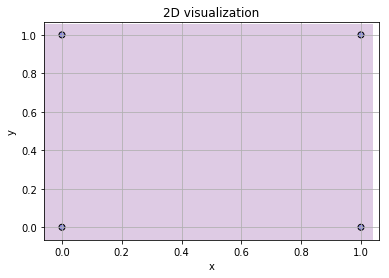

In [8]:
binary_visualize(X1, clf=model1, draw_contour=True)

## MNIST Digit Classification

In [9]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home=".")
print(len(mnist.data))
X2 = mnist.data/256.
mnist.target.__class__
y2 = to_onehot(mnist.target)

70000


In [10]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=10000, random_state=42)
X_train2.shape, y_train2.shape, X_train2.dtype

((60000, 784), (60000, 10), dtype('float64'))

In [11]:
model2 = Sequential(verbose=True,vis_acc=1)
# model2.add(Dropout(0.2, seed=0))

model2.add(Dense(30, input_dim=784, seed=1))
model2.add(Activation('relu'))
# model2.add(Dropout(0.2, seed=2))

# model2.add(Dense(30))
# model2.add(Activation('relu'))
# model2.add(Dropout(0.2, seed=4))

model2.add(Dense(10, seed=2))
model2.add(Activation('softmax'))

opt = StochasticGradientDescent(learning_rate=0.2, momentum=0., nesterov=1)
opt = Adagrad(learning_rate=0.2)
opt = RMSprop(learning_rate=0.001, decay=0.9)
opt = Adam(learning_rate=0.001, bias_fix=0)
model2.compile(optimizer=opt, loss="cross_entropy")


epoch: 1/10  acc: 93.12  loss: 0.416 
[████                                    ] 10% 
epoch: 2/10  acc: 94.35  loss: 0.342 
[████████                                ] 20% 
epoch: 3/10  acc: 95.03  loss: 0.301 
[████████████                            ] 30% 
epoch: 4/10  acc: 95.54  loss: 0.271 
[████████████████                        ] 40% 
epoch: 5/10  acc: 95.85  loss: 0.249 
[████████████████████                    ] 50% 
epoch: 6/10  acc: 96.20  loss: 0.230 
[████████████████████████                ] 60% 
epoch: 7/10  acc: 96.41  loss: 0.216 
[████████████████████████████            ] 70% 
epoch: 8/10  acc: 96.65  loss: 0.205 
[████████████████████████████████        ] 80% 
epoch: 9/10  acc: 96.79  loss: 0.195 
[████████████████████████████████████    ] 90% 
epoch: 10/10  acc: 96.93  loss: 0.187 
[████████████████████████████████████████] 100% 

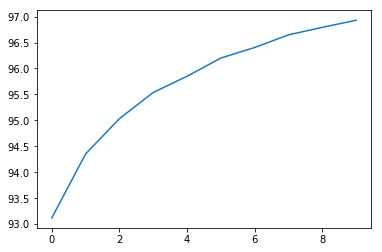

CPU times: user 39.6 s, sys: 32.7 s, total: 1min 12s
Wall time: 9.94 s


In [12]:
%time model2.fit(X_train2, y_train2, batch_size=256, epochs=10)

In [13]:
model2.accuracy(X_test2, y_test2)

95.83

In [14]:
van = 96.25, 95.59 mom  96.86 95.44 nag 97.21  96.01 adagrad 95.39 94.41 rmsprop 96.02 94.66 ams 95.17 94.56

SyntaxError: invalid syntax (<ipython-input-14-d83a0aae24c2>, line 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.losses import binary_crossentropy

In [ ]:
model = Sequential()
# model.add(Dropout(0.2))

model.add(Dense(30, input_dim=784))
model.add(Activation('sigmoid'))
# model.add(Dropout(0.5))

# model2.add(Dense(100, kernel_regularizer=l2(0), seed=None))
# model2.add(Activation('sigmoid'))
# model2.add(Dropout(0.2, seed=None))

# model.add(Dense(30))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer=SGD(lr=0.1), loss=binary_crossentropy, metrics=['accuracy'])

In [ ]:
%time model.fit(X_train2, y_train2, batch_size=128, epochs=10)

In [ ]:
model.evaluate(X_test2, y_test2, verbose = 0)

In [ ]:
0.9692 0.9729

## Training a single perceptron

In [ ]:
model3 = Sequential()
model3.add(Dense(1, input_dim=1, seed=10))
model3.add(Activation('sigmoid'))
sgd = StochasticGradientDescent(learning_rate=0.5)
model3.compile(optimizer=sgd, loss="mean_squared_error")

In [ ]:
X3 = np.array([1])
y3 = np.array([0.2])

In [ ]:
%time model3.fit(X3, y3, epochs=200)

In [ ]:
model3.forwardpass(X3)

## Radial

In [ ]:
X11 = Distribution.radial_binary(pts=300,
               mean=[0, 0],
               st=1,
               ed=2, seed=20)
X22 = Distribution.radial_binary(pts=300,
               mean=[0, 0],
               st=4,
               ed=5, seed=20)

Y11 = np.ones(X11.shape[0])
Y22 = np.zeros(X11.shape[0])

X5 = np.vstack((X11, X22))
y5 = np.hstack((Y11, Y22))

In [ ]:
y5 = to_onehot(y5)

In [ ]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=50, random_state=42)

In [ ]:
y_train5.shape

In [ ]:
model5 = Sequential(verbose=1, vis_each_epoch=True)
model5.add(Dense(10, input_dim=2, seed=1))
model5.add(Activation('sigmoid'))
model5.add(Dense(2, seed=2))
model5.add(Activation('sigmoid'))
model5.add(Dense(2, seed=3))
model5.add(Activation('sigmoid'))
sgd = StochasticGradientDescent(learning_rate=0.9)
model5.compile(optimizer=sgd, loss="mean_squared_error")

In [ ]:
X_train5[0]

In [ ]:
%time model5.fit(X_train5, y_train5, batch_size=4, epochs=10)

In [ ]:
binary_visualize(X_test5, clf=model5, draw_contour=True)